### Compares LGARTO (C) real examples against Hydrus
### Date: 23 October 2024 (last updated)
### Peter La Follette

In [1]:
synth_case = 2 #should be 1, 2, 3, or 4

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import sys, os
import importlib as imp
import copy
import pandas as pd
import datetime as dt
import hydroeval

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.dates as mdates

import pickle

In [3]:
# C version
sim_case = 'outputs/synthetic'+str(synth_case)+'_LGARTO/data_variables.csv' 
c_path_vars = sim_case

outfile = "c-hydrus-comparison_synth_"+str(synth_case)+"_LGARTO.png"
outfile_summpary_plot = "c-hydrus-comparison_synth_" + str(synth_case) + "_LGARTO_summary.png"

save_outfile = True

In [4]:
num_steps = 72*12
    
start = pd.Timestamp("2016-10-01 00:00:00")
end = pd.Timestamp("2016-10-04 00:00:00")
times = pd.date_range(start=start,end=end, periods=num_steps) #freq='min'
times_bmi = pd.date_range(start=start,end=end, periods=num_steps)

xfmt = mdates.DateFormatter('%Y/%m/%d')


In [5]:
data_c_vars = pd.read_csv(c_path_vars)
data_c_vars = data_c_vars[0:num_steps]
data_c_vars.head()

,Time,precipitation,potential_evapotranspiration,actual_evapotranspiration,surface_runoff,giuh_runoff,soil_storage,total_discharge,infiltration,percolation,groundwater_to_stream_recharge,mass_balance
0,2016-10-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.360801,0.0,0.0,0.000000e+00,0.0,0.0
1,2016-10-01 00:05:00,0.0,0.0,0.0,0.0,0.0,0.360801,0.0,0.0,-1.282100e-11,0.0,-0.0
2,2016-10-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.360801,0.0,0.0,-9.797000e-12,0.0,0.0
3,2016-10-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.360801,0.0,0.0,-7.760000e-12,0.0,0.0
4,2016-10-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.360801,0.0,0.0,-6.369000e-12,0.0,0.0


In [6]:
m_to_mm = 1000


### Read Hydrus data

In [7]:

hyd_path = 'HYDRUS_outputs/synth_'+str(synth_case)+'_LGARTO/T_Level_synth_'+str(synth_case)+'_LGARTO.txt'

HYDRUS_output = pd.read_fwf(hyd_path,widths=[13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13])            
HYDRUS_datetime_vec = []
i=0
prior_dt = dt.datetime.strptime(data_c_vars['Time'][0],'%Y-%m-%d %H:%M:%S') + dt.timedelta(hours=HYDRUS_output['Time'][i]-1)
for i in range(0,len(HYDRUS_output['Time'])):
    current_dt = dt.datetime.strptime(data_c_vars['Time'][0],'%Y-%m-%d %H:%M:%S') + dt.timedelta(hours=HYDRUS_output['Time'][i])
    if (current_dt!=prior_dt):
        HYDRUS_datetime_vec.append(current_dt)
    else:
        HYDRUS_output = HYDRUS_output.drop(i)
    prior_dt = current_dt
HYDRUS_output['HYDRUS_datetime_vec'] = HYDRUS_datetime_vec
HYDRUS_output = HYDRUS_output.set_index('HYDRUS_datetime_vec')

# HYDRUS_output = HYDRUS_output.resample('300s').pad()


In [8]:
len(HYDRUS_output)

# HYDRUS_output = HYDRUS_output[1:]

864

In [9]:
len(HYDRUS_output)

864

In [10]:


HYDRUS_output.head()

,Time,rTop,rRoot,vTop,vRoot,vBot,sum(rTop,) sum(rRoot,) sum(vTop,) sum(vRoot,...,hRoot,hBot,RunOff,sum(RunOff,) Volume,sum(Infil,) sum(Evap,) TLevel Cum(,WTrans) Snow,Layer
HYDRUS_datetime_vec,,,,,,,,,,,,,,,,,,,,,
2016-10-01 00:04:59.880,0.0833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-74.752,0.0,0.0,0.0,36.198,0.0,0.0,1 0.00,0.0,0.0
2016-10-01 00:10:00.120,0.1667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-74.752,0.0,0.0,0.0,36.198,0.0,0.0,2 0.00,0.0,0.0
2016-10-01 00:15:00.000,0.2500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-74.752,0.0,0.0,0.0,36.198,0.0,0.0,3 0.00,0.0,0.0
2016-10-01 00:19:59.880,0.3333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-74.752,0.0,0.0,0.0,36.198,0.0,0.0,4 0.00,0.0,0.0
2016-10-01 00:25:00.120,0.4167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-74.752,0.0,0.0,0.0,36.198,0.0,0.0,5 0.00,0.0,0.0


0      0.000000e+00
1     -1.282100e-09
2     -2.261800e-09
3     -3.037800e-09
4     -3.674700e-09
           ...     
859    2.431162e+00
860    2.433624e+00
861    2.436082e+00
862    2.438537e+00
863    2.440989e+00
Name: percolation, Length: 864, dtype: float64


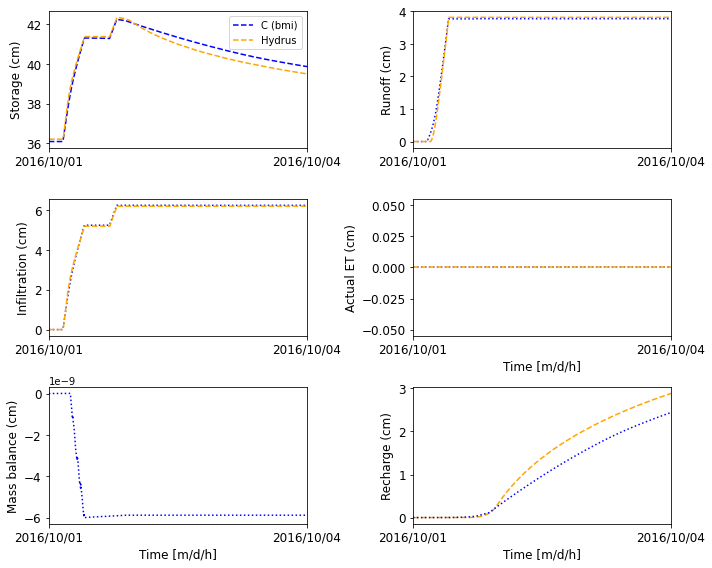

In [11]:
# end_step = 300
# times_bmi = times_bmi[0:end_step]
# data_c_vars = data_c_vars [0:end_step]
# vars_hydrus = data_c_vars [0:end_step]
# HYDRUS_output = HYDRUS_output[0:end_step]





#%matplotlib qt
fig, axs = plt.subplots(3,2, figsize=(10,8), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1,1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)
plt.tight_layout()
axs = axs.ravel()

vars_bmi = ['soil_storage', 'surface_runoff', 'infiltration', 'actual_evapotranspiration', 'mass_balance', 'percolation']
vars_hydrus = [')     Volume', 'sum(RunOff', 'sum(Infil', ')   sum(vRoot', ')    sum(vBot']
m_to_mm = 1000
m_to_cm = 100
timestep = 300/3600
y_labels = ['Storage (cm)', 'Runoff (cm)', 'Infiltration (cm)', 'Actual ET (cm)', 'Mass balance (cm)', 'Recharge (cm)']

for i in range(len(y_labels)):
    if i == 0:
        if i == 0:
            axs[i].plot(times_bmi, data_c_vars[vars_bmi[i]]*m_to_cm,'b',linestyle='dashed',label='C (bmi)')
            axs[i].plot(HYDRUS_output[vars_hydrus[i]],'k',linestyle='dashed',label='Hydrus',color='orange')
        else:
            hyd = []
            for t,v1 in zip(HYDRUS_output['Time'], HYDRUS_output[vars_hydrus[0]]):
                if t % 5.0 == 0:
                    hyd.append(v1)
            hyd_c_diff = []

            for v2, v3 in zip(np.array(hyd),np.array(data_c_vars[vars_bmi[0]]*m_to_cm)[1:]):
                hyd_c_diff.append(abs(v2-v3))

            axs[i].legend()
        
    elif (i < len(vars_hydrus)-1):
        if i == 1 or i == 2 or i ==3 : 
            
            axs[i].plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[i]]*m_to_cm),'blue',linestyle='dotted',label='C (bmi)')  
            axs[i].plot(HYDRUS_output[vars_hydrus[i]],'k',linestyle='dashed',label='Hydrus',color='orange')
        if i==4:
            axs[i].plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[i]]*m_to_cm),'blue',linestyle='dotted',label='C (bmi)')
            axs[4].axis(ymin=-1,ymax=1)
    elif (i==4):
        axs[i].plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[i]]*m_to_cm),'blue',linestyle='dotted',label='C (bmi)')
        axs[5].plot(-1*HYDRUS_output[vars_hydrus[i]],'k',linestyle='dashed',label='Hydrus',color='orange')
        print(np.cumsum(data_c_vars[vars_bmi[5]]*m_to_cm))
    else:
        axs[i].plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[i]]*m_to_cm),'b',linestyle='dotted',label='C (bmi)')

            
    axs[i].set_ylabel(y_labels[i],fontsize=12)
    
    if i >2:
        axs[i].set_xlabel('Time [m/d/h]',fontsize=12)
    axs[i].tick_params(axis='x', labelsize=12,rotation=0)
    axs[i].tick_params(axis='y', labelsize=12,rotation=0)
    axs[i].xaxis.set_major_formatter(xfmt)
    axs[i].xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    
    axs[i].set_xlim(times_bmi[0], times_bmi[-1])
axs[0].legend()
plt.tight_layout()

if (save_outfile):
    plt.savefig(outfile,dpi=400)


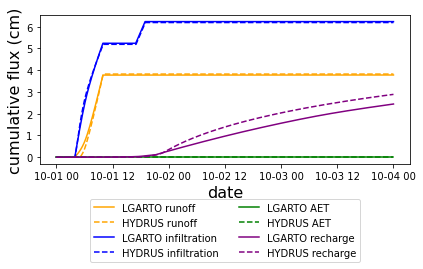

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['figure.facecolor'] = 'white'

fig, ax = plt.subplots()

ax.plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[1]] * m_to_cm), label='C (bmi)', color='orange')
ax.plot(HYDRUS_output[vars_hydrus[1]], linestyle='dashed', label='Hydrus', color='orange')

ax.plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[2]] * m_to_cm), label='C (bmi)', color='blue')
ax.plot(HYDRUS_output[vars_hydrus[2]], linestyle='dashed', label='Hydrus', color='blue')

ax.plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[3]] * m_to_cm), label='C (bmi)', color='green')
ax.plot(HYDRUS_output[vars_hydrus[3]], linestyle='dashed', label='Hydrus', color='green')

ax.plot(times_bmi, np.cumsum(data_c_vars[vars_bmi[5]] * m_to_cm), label='C (bmi)', color='purple')
ax.plot(-1 * HYDRUS_output[vars_hydrus[4]], linestyle='dashed', label='Hydrus', color='purple')

llabels = [
    'LGARTO runoff', 'HYDRUS runoff', 'LGARTO infiltration', 'HYDRUS infiltration',
    'LGARTO AET', 'HYDRUS AET', 'LGARTO recharge', 'HYDRUS recharge'
]

#legend below the plot
ax.legend(labels=llabels, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2)

# plt.ylim(0,1.5)

ax.set_ylabel("cumulative flux (cm)", fontsize=16)
ax.set_xlabel("date", fontsize=16)

# plt.vlines(times_bmi[128], 0, 12, colors ="red")
# plt.xlim(times_bmi[100],times_bmi[150])

fig.tight_layout(rect=[0, 0.05, 1, 1.03])

if (save_outfile):
    plt.savefig(outfile_summpary_plot, dpi=400, bbox_inches='tight')

plt.show()

In [13]:
runoff_LGARTO

NameError: name 'runoff_LGARTO' is not defined

In [ ]:
runoff_LGARTO = data_c_vars[vars_bmi[1]]*m_to_cm

# runoff_HYDRUS = HYDRUS_output['RunOff']

runoff_HYDRUS = [0.0]
for i in range(1,len(HYDRUS_output)):
#     if i!=1:
    runoff_HYDRUS.append(HYDRUS_output['sum(RunOff'][i] - HYDRUS_output['sum(RunOff'][i-1])

print("KGE in runoff: ")
print(hydroeval.kge(np.array(runoff_LGARTO), np.array(runoff_HYDRUS))[0][0])

print("NSE in runoff: ")
print(hydroeval.nse(np.array(runoff_LGARTO), np.array(runoff_HYDRUS)))

print("percent bias in runoff: ")
print(hydroeval.pbias(np.array(runoff_LGARTO), np.array(runoff_HYDRUS)))

print("RMSE in runoff (cm/h): ")
print(hydroeval.rmse(np.array(runoff_LGARTO), np.array(runoff_HYDRUS)))

print("cumulative runoff for LGARTO (cm): ")
print(np.sum(runoff_LGARTO))

print("cumulative runoff for HYDRUS (cm): ")
print(np.sum(runoff_HYDRUS))

print("difference (cm): ")
print(np.sum(runoff_HYDRUS) - np.sum(runoff_LGARTO))

In [ ]:
abs(np.sum(runoff_HYDRUS) - HYDRUS_output['sum(RunOff'][-1]) < 0.01

In [ ]:
infil_LGARTO = data_c_vars[vars_bmi[2]]*m_to_cm
infil_HYDRUS = HYDRUS_output['sum(Infil']#[1:]

infil_HYDRUS = np.array(infil_HYDRUS)
infil_HYDRUS_cumulative = HYDRUS_output['sum(Infil']#[1:]

i=0
for item in infil_HYDRUS:
#     print(item)
    if (i==0):
        item = item
    else:
        item = item - infil_HYDRUS_cumulative[i-1]
    infil_HYDRUS[i] = item
    i = i + 1
    
        
print("KGE in infiltration: ")
print(hydroeval.kge(np.array(infil_LGARTO), np.array(infil_HYDRUS))[0][0])

print("NSE in infiltration: ")
print(hydroeval.nse(np.array(infil_LGARTO), np.array(infil_HYDRUS)))

print("percent bias in infiltration: ")
print(hydroeval.pbias(np.array(infil_LGARTO), np.array(infil_HYDRUS)))

print("RMSE in infiltration (cm/h): ")
print(hydroeval.rmse(np.array(infil_LGARTO), np.array(infil_HYDRUS)))

print("cumulative infiltration for LGARTO (cm): ")
print(np.sum(infil_LGARTO))

print("cumulative infiltration for HYDRUS (cm): ")
print(np.sum(infil_HYDRUS))

print("difference (cm): ")
print(np.sum(infil_HYDRUS) - np.sum(infil_LGARTO))

In [ ]:
abs(np.sum(infil_HYDRUS) - HYDRUS_output['sum(Infil'][-1]) < 0.01

In [ ]:
#0 AET will yield a KGE and NSE of nan

AET_LGARTO = data_c_vars[vars_bmi[3]]*m_to_cm
# AET_HYDRUS = HYDRUS_output['vRoot']

AET_HYDRUS = [0.0]
for i in range(1,len(HYDRUS_output)):
#     if i!=1:
    AET_HYDRUS.append(HYDRUS_output[')   sum(vRoot'][i] - HYDRUS_output[')   sum(vRoot'][i-1])

print("KGE in AET: ")
print(hydroeval.kge(np.array(AET_LGARTO), np.array(AET_HYDRUS))[0][0])

print("NSE in AET: ")
print(hydroeval.nse(np.array(AET_LGARTO), np.array(AET_HYDRUS)))

print("percent bias in AET: ")
print(hydroeval.pbias(np.array(AET_LGARTO), np.array(AET_HYDRUS)))

print("RMSE in AET (cm/h): ")
print(hydroeval.rmse(np.array(AET_LGARTO), np.array(AET_HYDRUS)))

print("cumulative AET for LGARTO (cm): ")
print(np.sum(AET_LGARTO))

print("cumulative AET for HYDRUS (cm): ")
print(np.sum(AET_HYDRUS))

print("difference (cm): ")
print(np.sum(AET_HYDRUS) - np.sum(AET_LGARTO))

In [ ]:
plt.plot(AET_LGARTO)

In [ ]:
abs(np.sum(AET_HYDRUS) - HYDRUS_output[')   sum(vRoot'][-1]) < 0.01

In [ ]:
rch_LGARTO = data_c_vars[vars_bmi[5]]*m_to_cm
# rch_HYDRUS = -1*HYDRUS_output['vBot']

rch_HYDRUS = [0.0]
for i in range(1,len(HYDRUS_output)):
#     if i!=1:
    rch_HYDRUS.append(-1*(HYDRUS_output[')    sum(vBot'][i] - HYDRUS_output[')    sum(vBot'][i-1]))

print("KGE in recharge: ")
print(hydroeval.kge(np.array(rch_LGARTO), np.array(rch_HYDRUS))[0][0])

print("NSE in recharge: ")
print(hydroeval.nse(np.array(rch_LGARTO), np.array(rch_HYDRUS)))

print("percent bias in recharge: ")
print(hydroeval.pbias(np.array(rch_LGARTO), np.array(rch_HYDRUS)))

print("RMSE in recharge (cm/h): ")
print(hydroeval.rmse(np.array(rch_LGARTO), np.array(rch_HYDRUS)))

print("cumulative recharge for LGARTO (cm): ")
print(np.sum(rch_LGARTO))

print("cumulative recharge for HYDRUS (cm): ")
print(np.sum(rch_HYDRUS))

print("difference (cm): ")
print(np.sum(rch_HYDRUS) - np.sum(rch_LGARTO))


In [ ]:
abs(np.sum(rch_HYDRUS) - -1*HYDRUS_output[')    sum(vBot'][-1]) < 0.001

In [ ]:
plt.plot(rch_LGARTO)
plt.plot(rch_HYDRUS)

In [ ]:
rch_HYDRUS=np.array(rch_HYDRUS)
rch_LGARTO=np.array(rch_LGARTO)

rch_HYDRUS_ind=np.array(rch_HYDRUS)
rch_LGARTO_ind=np.array(rch_LGARTO)

i = 0
for _ in rch_HYDRUS:
    if i>0:
        rch_HYDRUS[i] = np.sum(rch_HYDRUS_ind[0:i])
        rch_LGARTO[i] = np.sum(rch_LGARTO_ind[0:i])
    i=i+1

# plt.plot(rch_LGARTO)
# plt.plot(rch_HYDRUS)

print("KGE in cumulative recharge: ")
print(hydroeval.kge(np.array(rch_LGARTO), np.array(rch_HYDRUS))[0][0])

print("NSE in cumulative recharge: ")
print(hydroeval.nse(np.array(rch_LGARTO), np.array(rch_HYDRUS)))

print("percent bias in cumulative recharge: ")
print(hydroeval.pbias(np.array(rch_LGARTO), np.array(rch_HYDRUS)))

print("RMSE in cumulative recharge (cm): ")
print(hydroeval.rmse(np.array(rch_LGARTO), np.array(rch_HYDRUS)))